### Presentation
1. They are looking for someone with the intersection of Javascript, Python, and Math
2. They are looking for someone who can take a problem, convert it to an idea, and communicate it in an effective way having the ability to answer technical questions

### Areas to cover
1. Javascript Ecosystem
- V8, optimizations, etc
2. Python
- CPython, optimizations, etc
3. Pytorch
- Compilation, Python wrapper around C++, etc
4. Math
- Partial derivations, computational graphs, algorithms(matrix multiply, backpropagation, autograd)
- NOTE: autograd is a technique to compute gradients efficiently and backpropagation is an algorithm that utilizes autograd


### Benchmarks
1. Time to run 
2. Total FLOPS
- (2 * n - 1) * m * p where AB = (m X n)(n X p)
3. FLOPS per second
4. Memory Usage
5. Garbage Collection Overhead
- Talk about garbage collection algorithms(Reference Counting, Mark and Sweep)

### Notes
1. Memory seemed unchanged from analyzing it with memory profiler
2. Garbage collection for both Python and Javascript seemed to be taking minimal time
- 0.4% to be exact

Next best bet is to summarize findings of comparing Python, Javascript, and Pytorch and move on to optimizing Javascript as best as I can

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

model_layers = [
        [3, 25],
        [25, 1],
    ]
model_layers = [
        [3, 25],
        [25, 25],
        [25, 1],
    ]
model_layers = [
        [3, 25],
        [25, 25],
        [25, 25],
        [25, 1],
    ]
model_layers = [
        [3, 25],
        [25, 75],
        [75, 25],
        [25, 1],
    ]

model_layers = [
        [3, 25],
        [25, 125],
        [125, 25],
        [25, 1],
    ]
model_layers = [
        [3, 75],
        [75, 125],
        [125, 75],
        [75, 1],
    ]
model_layers = [
        [3, 125],
        [125, 125],
        [125, 125],
        [125, 1],
    ]
model_layers = [
        [3, 125],
        [125, 125],
        [125, 125],
        [125, 125],
        [125, 1],
    ]
model_layers = [
        [3, 125],
        [125, 125],
        [125, 125],
        [125, 125],
        [125, 125],
        [125, 1],
    ]
model_layers = [
        [3, 125],
        [125, 125],
        [125, 350],
        [350, 125],
        [125, 125],
        [125, 1],
    ]
model_layers = [
        [3, 125],
        [125, 350],
        [350, 350],
        [350, 350],
        [350, 125],
        [125, 1],
    ]


In [2]:
data = {
    'flops': [500, 3625, 6750, 19250, 31750, 95250, 158750, 236875, 315000, 596250, 1665000],  # Example FLOPS values
    'duration_seconds': [0.3, .31, .33, .31, .32, .32, .33, .31, .32, .31, .33]      # Example duration values in seconds
}
pytorch_results = pd.DataFrame(data)

data = {
    'flops': [500, 3625, 6750, 19250, 31750, 95250, 158750, 236875, 315000, 596250, 1665000],  # Example FLOPS values
    'duration_seconds': [0.02, 0.09, .15, 0.5, 0.8, 2.9, 4.79, 7.5, 9.7, 20.3, 82.5]      # Example duration values in seconds
}
javascript_results = pd.DataFrame(data)

In [3]:
data = {
    'flops': [500, 3625, 6750, 19250, 31750, 95250, 158750, 236875, 315000, 596250, 1665000],  # Example FLOPS values
    'duration_seconds': [.2, 1.35, 3.21, 16.37, 113.07, 356, 625, 732, 1012, 1400, 2000]      # Example duration values in seconds
}
python_results = pd.DataFrame(data)

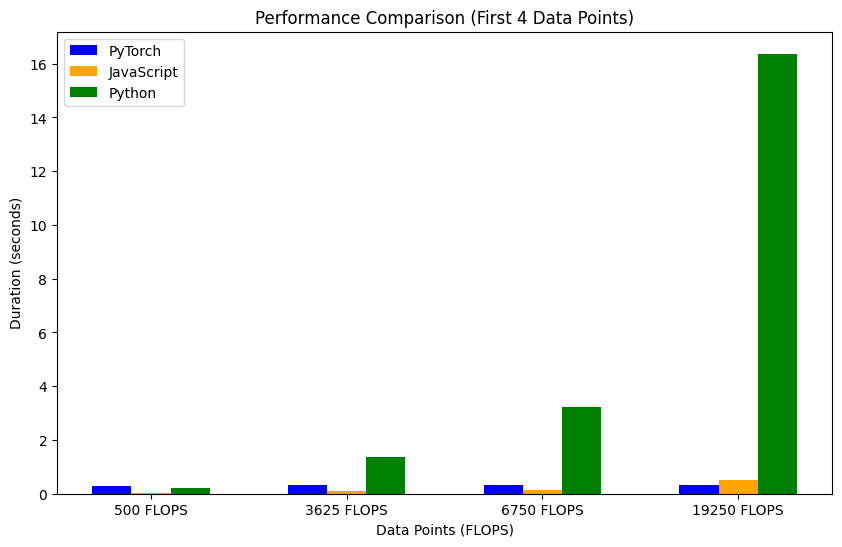

In [4]:
# Select the first 4 data points
selected_pytorch_4 = pytorch_results.iloc[:4]
selected_javascript_4 = javascript_results.iloc[:4]
selected_python_4 = python_results.iloc[:4]

# Bar chart for the first 4 data points with FLOPS as labels
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2

ax.bar([i - width for i in range(4)], selected_pytorch_4['duration_seconds'], width, label='PyTorch', color='blue')
ax.bar(range(4), selected_javascript_4['duration_seconds'], width, label='JavaScript', color='orange')
ax.bar([i + width for i in range(4)], selected_python_4['duration_seconds'], width, label='Python', color='green')

ax.set_xlabel('Data Points (FLOPS)')
ax.set_ylabel('Duration (seconds)')
ax.set_title('Performance Comparison (First 4 Data Points)')
ax.set_xticks(range(4))
ax.set_xticklabels([f'{flop} FLOPS' for flop in selected_python_4['flops']])
ax.legend()

plt.show()



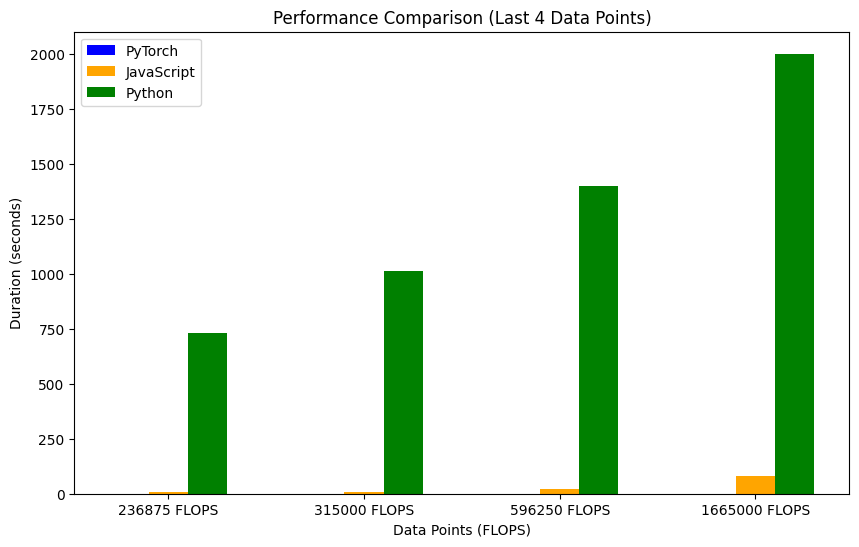

In [5]:
# Select the last 4 data points
selected_pytorch_last_4 = pytorch_results.iloc[-4:]
selected_javascript_last_4 = javascript_results.iloc[-4:]
selected_python_last_4 = python_results.iloc[-4:]
# Bar chart for the last 4 data points with FLOPS as labels
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar([i - width for i in range(4)], selected_pytorch_last_4['duration_seconds'], width, label='PyTorch', color='blue')
ax.bar(range(4), selected_javascript_last_4['duration_seconds'], width, label='JavaScript', color='orange')
ax.bar([i + width for i in range(4)], selected_python_last_4['duration_seconds'], width, label='Python', color='green')

ax.set_xlabel('Data Points (FLOPS)')
ax.set_ylabel('Duration (seconds)')
ax.set_title('Performance Comparison (Last 4 Data Points)')
ax.set_xticks(range(4))
ax.set_xticklabels([f'{flop} FLOPS' for flop in selected_python_last_4['flops']])
ax.legend()

plt.show()



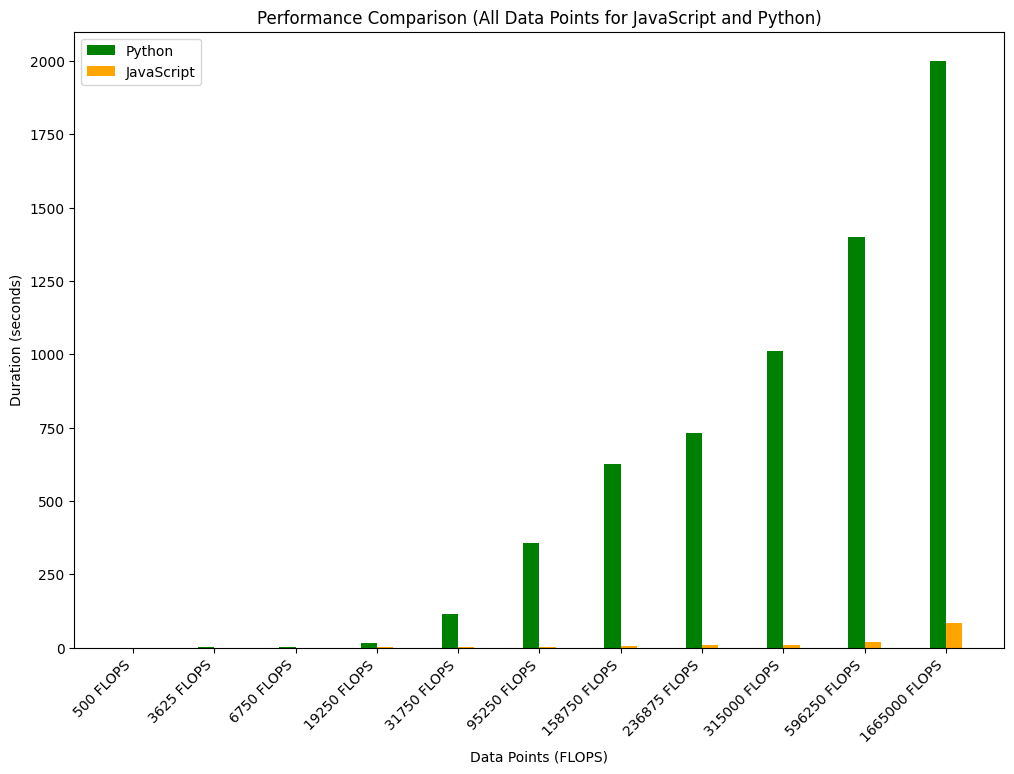

In [6]:
# Bar chart for all data points (JavaScript and Python only), with Python in green and FLOPS as labels
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar([i - width/2 for i in range(len(python_results))], python_results['duration_seconds'], width, label='Python', color='green')
ax.bar([i + width/2 for i in range(len(javascript_results))], javascript_results['duration_seconds'], width, label='JavaScript', color='orange')

ax.set_xlabel('Data Points (FLOPS)')
ax.set_ylabel('Duration (seconds)')
ax.set_title('Performance Comparison (All Data Points for JavaScript and Python)')
ax.set_xticks(range(len(python_results)))
ax.set_xticklabels([f'{flop} FLOPS' for flop in python_results['flops']], rotation=45, ha='right')
ax.legend()

plt.show()


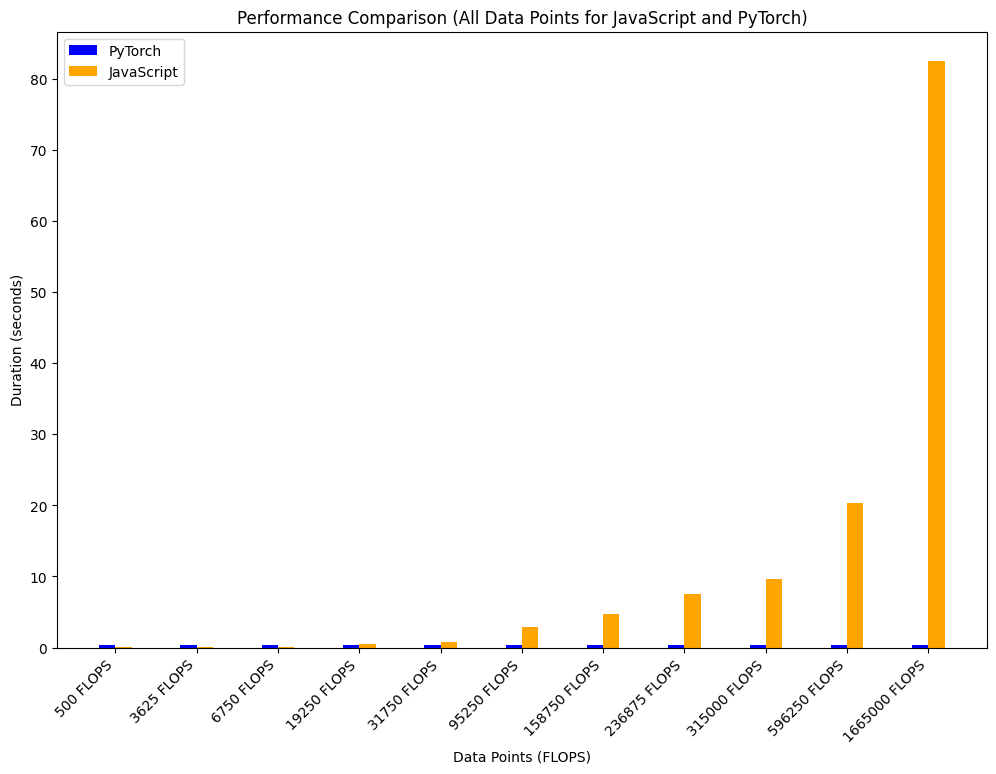

In [7]:
# Bar chart for all data points (JavaScript and PyTorch only) with FLOPS as labels
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar([i - width/2 for i in range(len(pytorch_results))], pytorch_results['duration_seconds'], width, label='PyTorch', color='blue')
ax.bar([i + width/2 for i in range(len(javascript_results))], javascript_results['duration_seconds'], width, label='JavaScript', color='orange')

ax.set_xlabel('Data Points (FLOPS)')
ax.set_ylabel('Duration (seconds)')
ax.set_title('Performance Comparison (All Data Points for JavaScript and PyTorch)')
ax.set_xticks(range(len(pytorch_results)))
ax.set_xticklabels([f'{flop} FLOPS' for flop in pytorch_results['flops']], rotation=45, ha='right')
ax.legend()

plt.show()


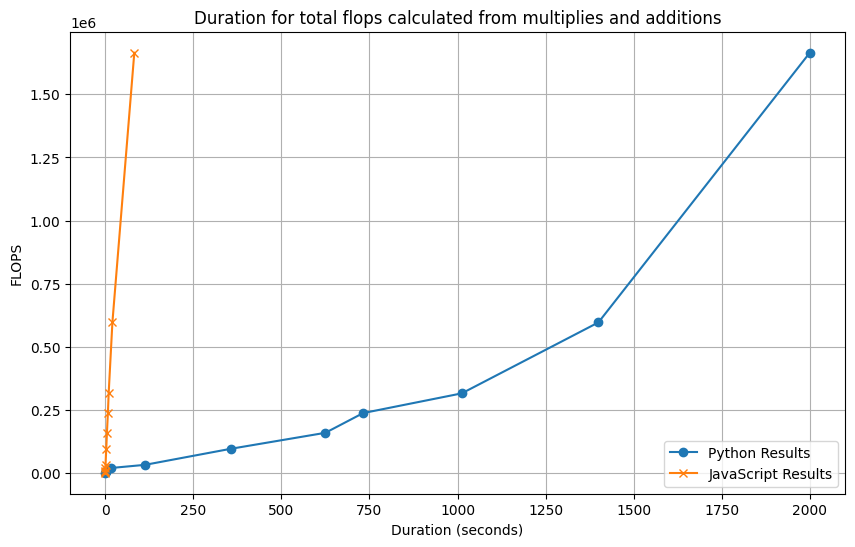

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(python_results['duration_seconds'], python_results['flops'], marker='o', label='Python Results')
plt.plot(javascript_results['duration_seconds'], javascript_results['flops'], marker='x', label='JavaScript Results')
plt.title('Duration for total flops calculated from multiplies and additions')
plt.xlabel('Duration (seconds)')
plt.ylabel('FLOPS')
plt.legend()
plt.grid(True)
plt.show()

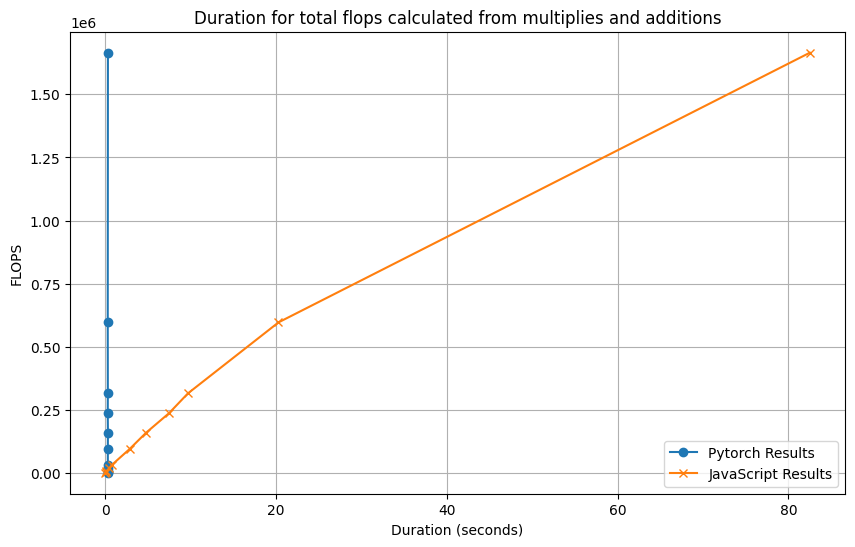

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(pytorch_results['duration_seconds'], pytorch_results['flops'], marker='o', label='Pytorch Results')
plt.plot(javascript_results['duration_seconds'], javascript_results['flops'], marker='x', label='JavaScript Results')
plt.title('Duration for total flops calculated from multiplies and additions')
plt.xlabel('Duration (seconds)')
plt.ylabel('FLOPS')
plt.legend()
plt.grid(True)
plt.show()